In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('product_sales.csv')

## Data Validation
I first looked at the information present in the CSV using Python, which described the columns present, their data types, and their unique counts. The revenue column contained 1,074 null records, around ~7% of the total records. Since the dataset contains enough non-null values, I removed the entire row for each of the null revenue records. Imputing the null records for revenue would not be ideal, and the methods for doing so would be challenging due to the unknown variability of the products sold. Furthermore, it is unclear from the dataset what is meant when the revenue is null, as there are valid records for the number of products sold which infers that a sale for some amount did take place.

In [2]:
print(df.info())

df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


I observed that the dataset contains only unique customers by counting the unique customer_id values. There are no duplicates of customers nor of rows, so analyzing aggregates or trends based on customers is not possible using this dataset but would be advisable for future analyses with larger datasets. I've interpreted this dataset as 1 order per 1 customer, given that the Week column attributes the week since product launch that the sale (singular) was made.

In [4]:
print(df['customer_id'].nunique()/len(df))

1.0


I checked the value counts of each categorical column to see what distinct records are present and plotted the distribution. I noticed that the sales_method column contains typos. It can be inferred that 'email' is intended to be 'Email' and em + call is intended to be 'Email + Call'. Therefore, these records have been replaced.

In [5]:
cat_cols = ['sales_method', 'state']

for col in cat_cols:
    print(df[col].value_counts())

df['sales_method'] = df['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'}).astype('category')

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64
California        1739
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virgin

I described the dataset and confirmed that the week column's values were between 1 and 6, representing the last 6 weeks of sales data. I checked the range of the years_as_customer and noticed that the minimum is 0 and the maximum is 63. Pens and Printers has been around for 40 years as of writing (2024), so no customer should have a years_as_customer value greater than 40. As a result, I filtered the dataset to only contain records where the years_as_customer is at or below 40, removing 2 records (years = 63 and 47), given that the 2 records are an insignificant portion of the entire dataset.

In [10]:
print(df.describe())

print(df[df['years_as_customer'] > 40])

df = df.drop(df[df['years_as_customer'] > 40].index, axis=0)

# Check that they were removed
print(df[df['years_as_customer'] > 40])

               week       nb_sold       revenue  years_as_customer  \
count  13926.000000  13926.000000  13926.000000       13926.000000   
mean       3.078271     10.040069     93.934943           4.978960   
std        1.650650      1.789690     47.435312           5.047828   
min        1.000000      7.000000     32.540000           0.000000   
25%        1.000000      9.000000     52.470000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        4.000000     11.000000    107.327500           7.000000   
max        6.000000     16.000000    238.320000          63.000000   

       nb_site_visits  
count    13926.000000  
mean        24.947006  
std          3.491491  
min         12.000000  
25%         23.000000  
50%         25.000000  
75%         27.000000  
max         37.000000  
       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
138

I confirmed that the minimum of nb_sold, revenue, and nb_site_visits are all above 0 and their maximums are within a logical range. I checked the unique values for the state column to confirm that there are no duplicate states, varying text syntax, or invalid entries; all states are accurate and standardized. Finally, I checked the data types of all columns to confirm that they are appropriate, with revenue being a float, other numerical columns being integers, and text columns being objects. I decided to change the sales_method data type to category for performance, since it only has 3 possible values.

All other columns and values in the dataset appear normal and accurate. I did not remove any columns, as each column was used in the analysis and should be inspected in the future for any changes.

In [11]:
print(df['state'].unique())
print(df.dtypes)

['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                  object
dtype: object


## Exploratory Analysis
### Distributions
To visually represent the value counts of each column, the graphs below were generated.

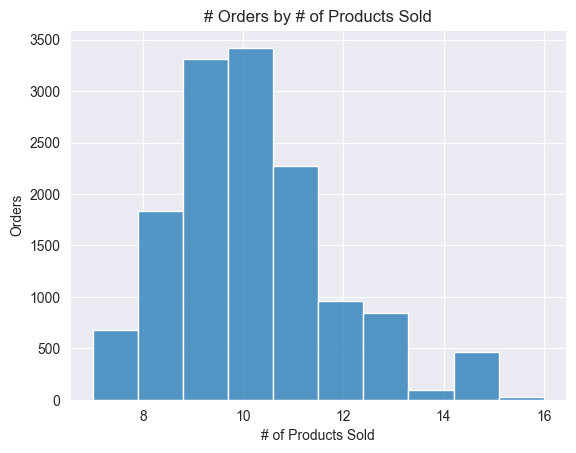

In [12]:
sns.histplot(data=df, x='nb_sold', bins=df['nb_sold'].nunique())
plt.ylabel('Orders')
plt.xlabel('# of Products Sold')
plt.title('# Orders by # of Products Sold')
plt.show()

The graph above shows the distribution of the number of products sold for each order. The average number of products sold per order is between 9 and 10. There is a slight right skew, suggesting that the number of products per order will infrequently exceed 13.

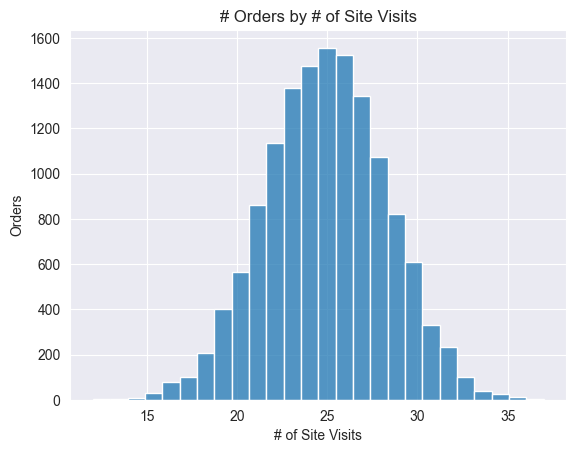

In [13]:
sns.histplot(data=df, x='nb_site_visits', bins=df['nb_site_visits'].nunique())
plt.ylabel('Orders')
plt.xlabel('# of Site Visits')
plt.title('# Orders by # of Site Visits')
plt.show()

The graph above shows the distribution of the number of website visits the customer had in the last 6 months before placing an order. It is normally distributed, and the average number of visits is 25. Because the data looks at the last 6 months whereas the sale data for new products covers the last 6 weeks, this column may not represent information about the number of visits necessary before a single sale is made.

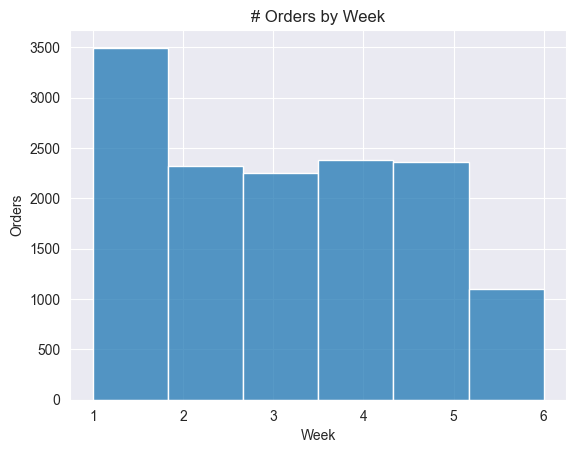

In [14]:
sns.histplot(data=df, x='week', bins=df['week'].nunique())
plt.ylabel('Orders')
plt.xlabel('Week')
plt.title('# Orders by Week')
plt.show()

This graph shows the number of orders placed since the product was launched. There is a notably high number of sales made within the first week, and a notably low number made during the 6th week.

### Revenue

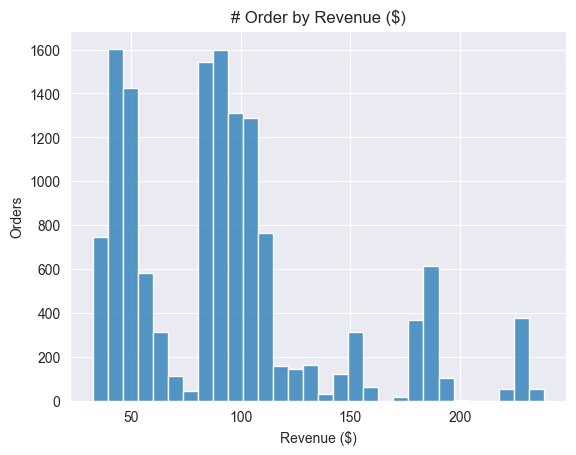

In [15]:
sns.histplot(data=df, x='revenue', bins=30)
plt.ylabel('Orders')
plt.xlabel('Revenue ($)')
plt.title('# Order by Revenue ($)')
plt.show()

The graphs above and below visualize the distribution of revenue earned across orders. In both cases, we see some outliers, which are skewed right. Based on the range of revenues, we can infer that these outliers are not due to inaccurate data entry or a glitch and appear to be infrequent large orders. Therefore, they do not need to be removed from the dataset and do contribute to the accuracy of our analysis. On average, orders are worth $80-90.

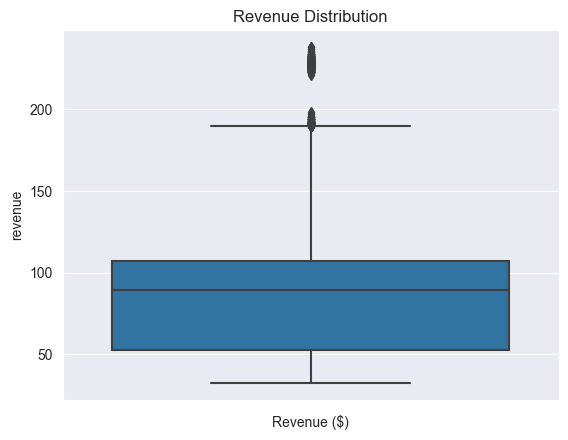

In [16]:
sns.boxplot(data=df, y='revenue')
plt.xlabel('Revenue ($)')
plt.title('Revenue Distribution')
plt.show()

### Sales Methods
Next, we want to explore the relationship of our three sales methods on the number of sales, number of products sold, and revenue earned.

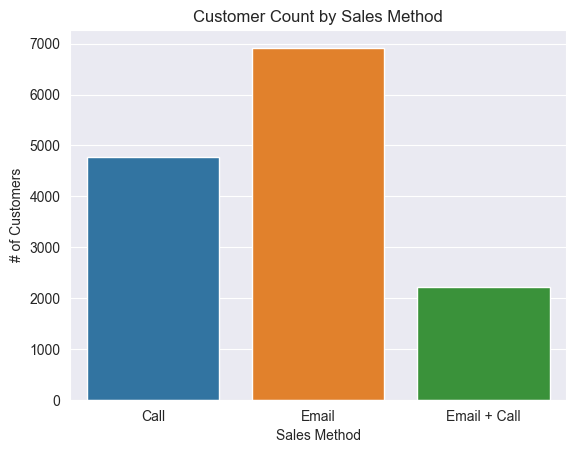

In [21]:
groupby_method = df.groupby('sales_method').agg(avg_nb_sold=('nb_sold', 'mean'), tot_nb_sold=('nb_sold', 'sum'), avg_rev=('revenue', 'mean'), tot_rev=('revenue', 'sum'), avg_week=('week', 'mean'), avg_site_visit=('nb_site_visits', 'mean'), avg_yrs_cust=('years_as_customer', 'mean'), cust_count=('customer_id', 'count'))
groupby_method['avg_rev_per_item'] = groupby_method['avg_rev'] / groupby_method['avg_nb_sold']

sns.barplot(data=groupby_method, x=groupby_method.index, y='cust_count')
plt.xlabel('Sales Method')
plt.ylabel('# of Customers')
plt.title('Customer Count by Sales Method')
plt.show()

This bar chart visualizes the number of sales earned broken down by sales method. We see that the Email method accounted for the majority of sales by far nearing 7,000, whereas the Call method accounted for nearly 5,000 and Email & Call accounted for just over 2,000.

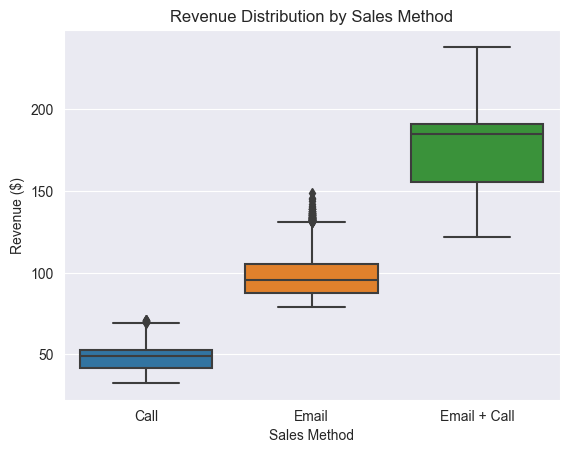

In [23]:
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Sales Method')
plt.title('Revenue Distribution by Sales Method')
plt.show()

Interestingly, we see that the distribution of revenue by sales method shows the Email & Call method outperforming the other two methods by a large margin. This prompted me to look at a table of aggregated records grouped by the sales method to find some more information about this disparity.

In [28]:
print(groupby_method)

              avg_nb_sold  tot_nb_sold     avg_rev    tot_rev  avg_week  \
sales_method                                                              
Call             9.500837        45414   47.596866  227513.02  3.419038   
Email            9.723017        67293   97.127671  672220.61  2.461205   
Email + Call    12.186685        27091  183.651233  408256.69  4.266757   

              avg_site_visit  avg_yrs_cust  cust_count  avg_rev_per_item  
sales_method                                                              
Call               24.421757      5.152720        4780          5.009755  
Email              24.734142      4.989886        6921          9.989458  
Email + Call       26.738641      4.526316        2223         15.069827  


From this table, we see that the number of items sold and the number of sales is quite low for the Email & Call method, but the average revenue earned per sale and per item is much higher. This raises an important point: This dataset tells us how many sales were earned for each method, but it does not tell us how many customers were contacted using each method. We might find that the Email & Call method performs quite poorly in volume sales, but earns more per order, only if the number of customers receiving each method were roughly uniform. If, instead, fewer customers received the Email & Call method, then this data indicates a substantial performance boost for this method. While the advice will ultimately depend on the answer to this question, we can move forward with the exploration.

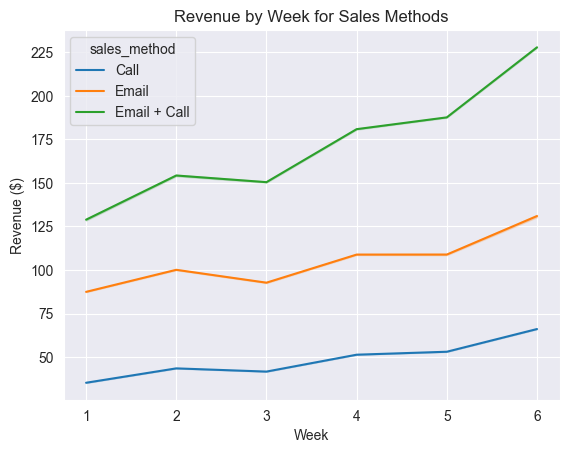

In [30]:
sns.lineplot(data=df, x='week', y='revenue', hue='sales_method')
plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Week for Sales Methods')
plt.show()

The line graph above plots the revenue per order for each sales method across the weeks since the products launched. We can see a trend of the revenue per order increasing over time for all methods, and the Email & Call method showing the highest revenue per order and the Call method showing the lowest. This leads to the question about how the total revenue stacks up for each week.

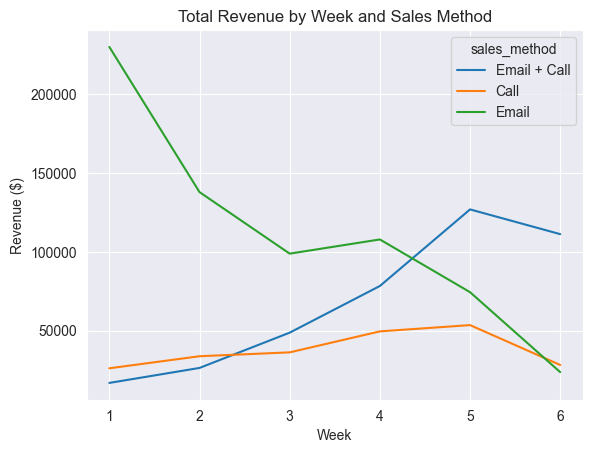

In [31]:
groupby_week_method = df.groupby(['sales_method', 'week']).agg(avg_rev=('revenue', 'mean'), tot_rev=('revenue', 'sum'))

sns.lineplot(data=groupby_week_method, x='week', y='tot_rev', hue='sales_method', hue_order=['Email + Call', 'Call', 'Email'])
plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.title('Total Revenue by Week and Sales Method')
plt.show()

Here we see that the Email method started strong in the first week and quickly plummeted. It had a slight uptick after week 3, likely due to the follow up email. The Call method remained low throughout the campaign. And the Email & Call method started slow and ramped up towards the 5th and 6th weeks. The upward ramp for the Email & Call method is understandable given the compounding effects of emailing and calling a week later. This data suggests that the methods employed varied throughout the campaign, likely starting with Email and Call, and employing Email & Call later on during the campaign. It further suggests that there might be an uneven distribution in the quantity of sales approaches using each method.

### Correlation
Finally, we will inspect the relationship between revenue and a few ancillary metrics, including the week, the number of visits, and the number of years as a customer.

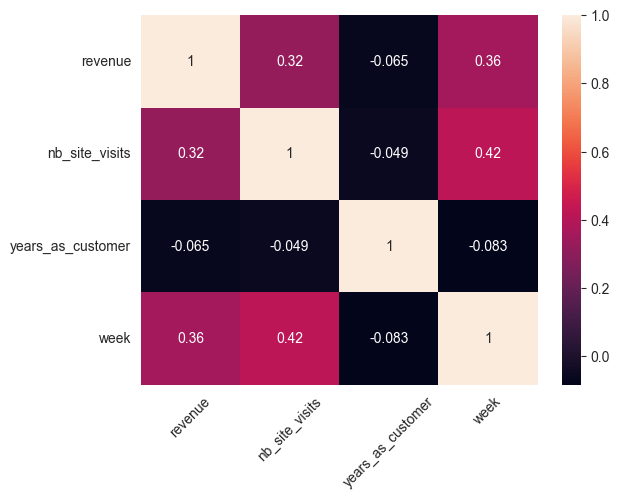

In [32]:
df_corr = df[['revenue', 'nb_site_visits', 'years_as_customer', 'week']]
sns.heatmap(df_corr.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

This heatmap shows a week positive relationship between revenue and the number of site visits and week, and effectively no relationship between revenue and the years as a customer.

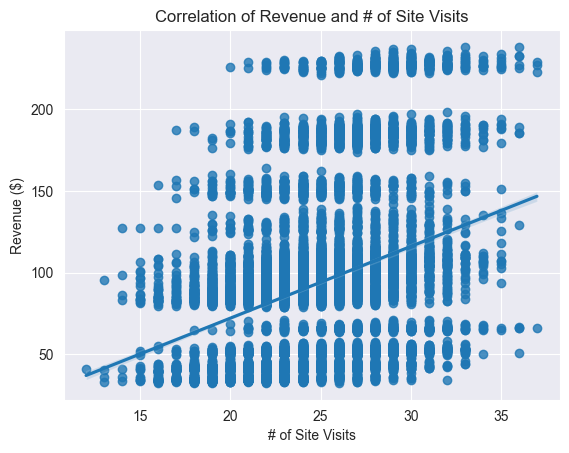

In [33]:
sns.regplot(data=df, x='nb_site_visits', y='revenue')
plt.xlabel('# of Site Visits')
plt.ylabel('Revenue ($)')
plt.title('Correlation of Revenue and # of Site Visits')
plt.show()

Plotting the relationship between revenue and the number of site visits, the data looks largely sporadic, but we do see a trend upward, suggesting that more site visits are correlated with more revenue. This relationship may have confounding elements, such as the number of orders, making this relationship insignificant.

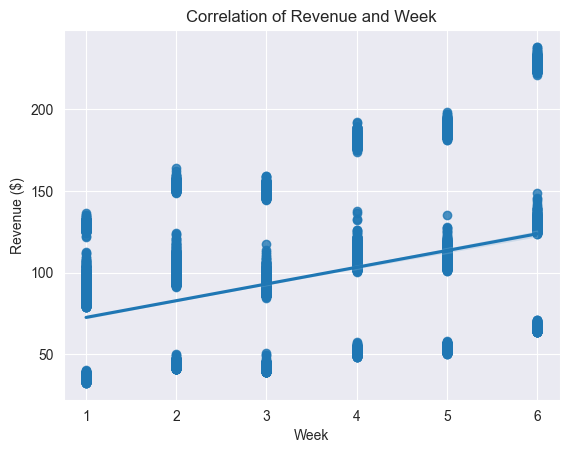

In [34]:
sns.regplot(data=df, x='week', y='revenue')
plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.title('Correlation of Revenue and Week')
plt.show()

Plotting the relationship between revenue and the week, we do see a slight uptick on the regression line. However, it is not meaningful enough to infer that the week has much to do with revenue alone.

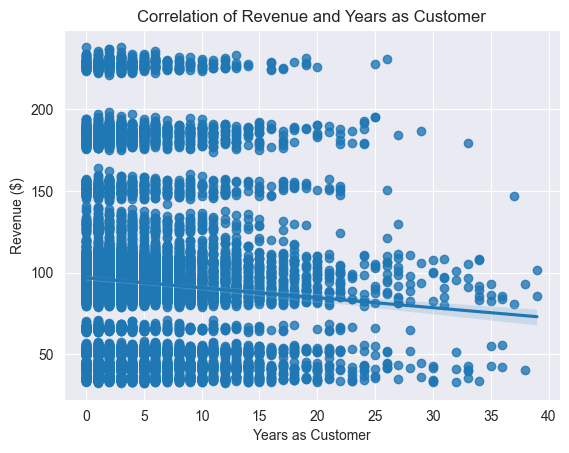

In [35]:
sns.regplot(data=df, x='years_as_customer', y='revenue')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue ($)')
plt.title('Correlation of Revenue and Years as Customer')
plt.show()

Finally, plotting the relationship between revenue and the years as a customer seems to indicate complete randomness and no correlation between the two.

To get a better idea of the customers, we can also look at the metrics by state. The distribution of average revenue is relatively narrow, meaning that there is not much variation of revenue depending on the state. While total revenue is skewed towards larger states, the average revenue by state is consistent. All other metrics appear evenly distributed as well with no indicate of preference for state, suggesting that the state a customer lives in has no meaningful effect on sales.

## Metrics
To better understand the relationship between sales, sales methods, and customers, Pens and Printers should employ four key metrics.

**Average Revenue Per User (ARPU)**
The average revenue per user, when stratified by the sales method, tells us how much revenue each sales method is generated per order on average. This should be the leading metric on effectiveness of each sales method, given that the distribution of sales attempts by sales method is roughly even. If there is disproportionate use of sales methods, then dividing ARPU by the number of sales attempts will provide a better understanding of comparative efficacy.

Since this dataset contains only unique customer ids and no repeat customers, the average revenue when grouped by sales method provides the ARPU metric, which was already provided in the table earlier:

arpu = groupby_method['avg_rev']
print(arpu)

**Average Revenue Per Item Sold**
Within this dataset, we can quantify the average revenue per item sold for each order and stratify it by the sales method. This is a metric that I generated for the table shown previously:

In [40]:
arpi = groupby_method['avg_rev_per_item']
print(arpi)

sales_method
Call             5.009755
Email            9.989458
Email + Call    15.069827
Name: avg_rev_per_item, dtype: float64


Using this metric, we can identify how each sales method performs on generating value per order in addition to the average revenue per order.

**Number of Sales Attempts**
Pens and Printers should consider tracking the number of sales attempts made to a customer, whether they place an order or not. This metric alone can open up the use of additional metrics, such as conversion rates, revenue per attempt, and ARPU/Sales Attempts which can provide valuable insights into the true efficacy of each sales method. Since that metric is not included in this dataset, it is not certain whether the distribution of sales method attempts was even, which might lead to a skewed analysis.

**Customer Lifetime Value (CLV)**
It would also be beneficial for Pens and Printers to track the customer lifetime value and analyze the efficacy of each sales method on different segments of CLV. We might find a certain method leads to much stronger long-term value per sales attempt in the face of short-term results. The number of sales, revenue, and years as a customer are already provided in the current dataset. With larger datasets over a longer period of time, it would be possible to track the CLV.

## Recommendations
In sum, I recommend that Pens and Printers inspects the distribution of sale attempts by sales method for this dataset before making any final decisions about which sales method to employ going forward. I would also encourage the development of that metric for future datasets. This will provide a much stronger base for comparative analysis between sales methods.

Assuming that the distribution of sales attempts was even, then I recommend employing both the Email and Email & Call campaigns. Email is low effort and performs modestly, and the data showed that the volume of sales was substantial for Email even if the revenue per sale was around average. Email & Call does require more effort, but it appears to yield much better revenue per sale results, making the effort worthwhile. I would recommend monitoring the labor per sale and ensure that calls remain around 10 minutes. Employ the Email & Call method has much as labor permits, meaning that as long as there are agents available to make the calls, make the calls. For all other prospects, utilize the Email method. Eliminate the Call only method. It is too cumbersome of an approach for such little result.

Additionally, there is an opportunity here for optimizing labor using predictive analytics. If we can predict the characteristics of customers which result in a higher probability of converting sales (and high revenue sales), then we should strategically employ the Email & Call method to those prospective customers first.

I would also recommend tracking the number of site visits after a sales attempt. This will help illuminate the effectiveness of each sales method in generating interest, even if that did not lead to a sale. We may find that the approach is not as much the distinguishing factor as something in the middle or bottom of the funnel. For example, perhaps the Email & Call method results in larger revenue per order due to the availability of an agent to help answer remaining questions and guide the customer through the remainder of the process, whereas the Email method generates far more clicks and interest, but the customer abandons the sale while looking for information on the website or because they struggled with the checkout process.

Thank you.